# **Automatic Speech Recognition Hands on excercise**

In [16]:
# When running in colab
! pip install -qq datasets transformers librosa gradio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.8/19.8 MB 65.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.4/58.4 kB 8.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 288.4/288.4 kB 35.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.4/75.4 kB 10.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.5/50.5 kB 6.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 137.0/137.0 kB 16.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.7/45.7 kB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 18.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 7.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.5/46.5 kB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.7/43.7 kB 5.7 MB/s eta 0:

In [2]:
from datasets import load_dataset
import transformers
import librosa

In [3]:
ds = load_dataset("facebook/voxpopuli", "es", split="train", streaming=True)
first3 = list(ds.take(3))

In [4]:
sample = first3[2]
sample

{'audio_id': '20101123-0900-PLENARY-5-es_20101123-10:48:32_0',
 'language': 3,
 'audio': {'path': 'train_part_0/20101123-0900-PLENARY-5-es_20101123-10:48:32_0.wav',
  'array': array([-0.00128174, -0.00112915, -0.00164795, ...,  0.00546265,
         -0.0078125 , -0.01699829]),
  'sampling_rate': 16000},
 'raw_text': 'Señora Presidenta, la competitividad es importante, pero no puede ser el único criterio.',
 'normalized_text': 'señora presidenta la competitividad es importante pero no puede ser el único criterio.',
 'gender': 'female',
 'speaker_id': '96701',
 'is_gold_transcript': True,
 'accent': 'None'}

In [5]:
array = sample["audio"]["array"]
sampling_rate = sample["audio"]["sampling_rate"]
print("Shape of the raw array:", array.shape)
print("Sampling rate:", sampling_rate, "Hz")


Shape of the raw array: (81590,)
Sampling rate: 16000 Hz


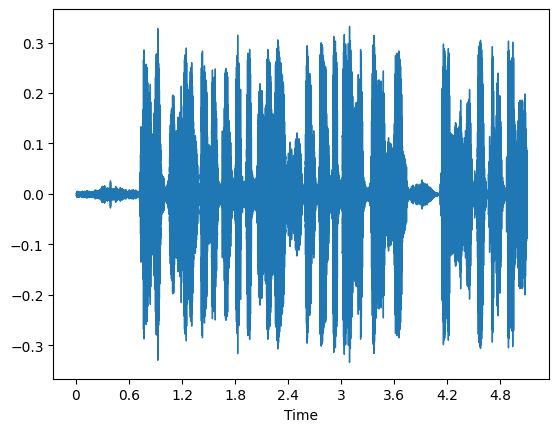

In [6]:
import librosa

librosa.display.waveshow(array, sr=sampling_rate)

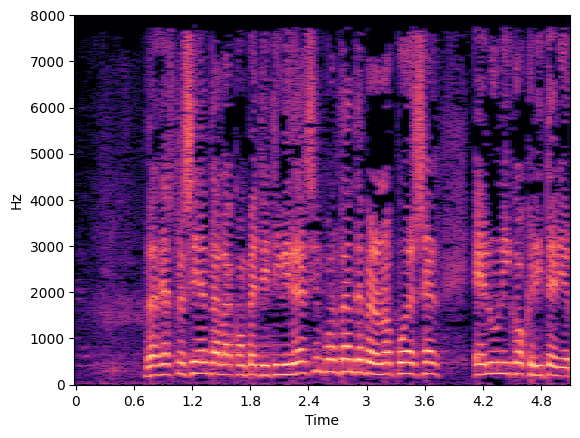

In [7]:
import numpy as np

s_db = librosa.amplitude_to_db(np.abs(librosa.stft(array)), ref=np.max)

librosa.display.specshow(s_db, x_axis="time", y_axis="hz", sr=sampling_rate)

In [9]:
import torch
from transformers import pipeline

model_id = "facebook/mms-1b-all"
asr = pipeline(
    "automatic-speech-recognition",
    model_id,
    device=0
    )

In [12]:
from transformers import AutoProcessor

processor = AutoProcessor.from_pre, share=True)trained(model_id)
processor


Wav2Vec2Processor:
- feature_extractor: Wav2Vec2FeatureExtractor {
  "do_normalize": true,
  "feature_extractor_type": "Wav2Vec2FeatureExtractor",
  "feature_size": 1,
  "padding_side": "right",
  "padding_value": 0,
  "processor_class": "Wav2Vec2Processor",
  "return_attention_mask": true,
  "sampling_rate": 16000
}

- tokenizer: Wav2Vec2CTCTokenizer(name_or_path='facebook/mms-1b-all', vocab_size=154, model_max_length=1000000000000000019884624838656, is_fast=False, padding_side='right', truncation_side='right', special_tokens={'bos_token': '<s>', 'eos_token': '</s>', 'unk_token': '<unk>', 'pad_token': '<pad>'}, clean_up_tokenization_spaces=True)

In [13]:
# array is already sampled at 16k Hz
asr(array)["text"]

'seora presidenta la competitividad es importante pero no puede ser el nico criterio'

In [11]:
sample["raw_text"]

'Señora Presidenta, la competitividad es importante, pero no puede ser el único criterio.'

In [ ]:
import gradio as gr

def generate_audio():
    audio = sample["audio"]
    return audio["sampling_rate"], audio["array"]

with gr.Blocks() as demo:
    with gr.Column():
        audio = generate_audio()
        output = gr.Audio(audio)

demo.launch(debug=True, share=True)